In [0]:
import pandas as pd
import numpy as np

In [0]:
1000
100

30%

In [0]:
df = pd.DataFrame({'group': ['A','B'],'leads':[700,300],'sale':[70,40]})

In [0]:
df['conv'] = df['sale'] / df['leads']

In [0]:
df

,group,leads,sale,conv
0,A,700,70,0.100000
1,B,300,40,0.133333


https://www.evanmiller.org/ab-testing/chi-squared.html#!70/700;40/300@95

(p = 0.12)

In [0]:
t1 = pd.DataFrame([0] * (700-70) + [1] * 70)

In [0]:
t1.mean()

0    0.1
dtype: float64

In [0]:
t2 = pd.DataFrame([0] * (300-40) + [1] * 40)

In [0]:
t2.mean()

0    0.133333
dtype: float64

In [0]:
t1['group'] = 'A'

In [0]:
t1

,0,group
0,0,A
1,0,A
2,0,A
3,0,A
4,0,A
...,...,...
695,1,A
696,1,A
697,1,A
698,1,A


In [0]:
t2['group'] = 'B'

In [0]:
t = pd.concat([t1,t2])

In [0]:
t

,0,group
0,0,A
1,0,A
2,0,A
3,0,A
4,0,A
...,...,...
295,1,B
296,1,B
297,1,B
298,1,B


In [0]:
t.columns = ['sale','group']

In [0]:
t

,sale,group
0,0,A
1,0,A
2,0,A
3,0,A
4,0,A
...,...,...
295,1,B
296,1,B
297,1,B
298,1,B


In [0]:
t.groupby('group')['sale'].agg(['count','mean']).reset_index()

,group,count,mean
0,A,700,0.100000
1,B,300,0.133333


In [0]:
[0,0,0,1]

In [0]:
(0 + 0 + 0 + 1) / 4

0.25

In [0]:
np.mean([0,0,0,1])

0.25

In [0]:
df

,group,leads,sale,conv
0,A,700,70,0.100000
1,B,300,40,0.133333


In [0]:
t

,sale,group
0,0,A
1,0,A
2,0,A
3,0,A
4,0,A
...,...,...
295,1,B
296,1,B
297,1,B
298,1,B


In [0]:
d = pd.DataFrame([1,2,3,4])

In [0]:
d.sample(5,replace=True)

,0
3,4
1,2
3,4
1,2
1,2


In [0]:
df

,group,leads,sale,conv
0,A,700,70,0.100000
1,B,300,40,0.133333


In [0]:
a = t.sample(700,replace=True)

In [0]:
a['sale'].mean()

0.10428571428571429

In [0]:
b = t.sample(300,replace=True)

In [0]:
b['sale'].mean()

0.10666666666666667

In [0]:
a = t.sample(700,replace=True)['sale'].mean()
b = t.sample(300,replace=True)['sale'].mean()
print(a,b)

0.10857142857142857 0.09333333333333334


In [0]:
df

,group,leads,sale,conv
0,A,700,70,0.100000
1,B,300,40,0.133333


In [0]:
diff = np.abs(.1 - 0.133333)

In [0]:
a = t.sample(700,replace=True)['sale'].mean()
b = t.sample(300,replace=True)['sale'].mean()
print(np.abs(a-b))

0.024285714285714285


In [0]:
diff

0.033333

In [0]:
from tqdm.notebook import tqdm

In [0]:
n = 10000
res = []
for i in tqdm(range(n)):
  a = t.sample(700,replace=True)['sale'].mean()
  b = t.sample(300,replace=True)['sale'].mean()
  res.append(np.abs(a-b) >= diff)

In [0]:
np.mean(res)

0.1252

In [0]:
from scipy.stats import chi2_contingency

In [0]:
df

,group,leads,sale,conv
0,A,700,70,0.100000
1,B,300,40,0.133333


In [0]:
df['no_sale'] = df['leads'] - df['sale']

In [0]:
df[['no_sale','sale']]

,no_sale,sale
0,630,70
1,260,40


In [0]:
chi2_contingency(df[['no_sale','sale']],correction=False)

(2.383384405856316, 0.12263161412141518, 1, array([[623.,  77.],
        [267.,  33.]]))

In [0]:
d = pd.DataFrame(np.random.normal(10,3,size=1000))

In [0]:
d[1] = pd.DataFrame(np.random.normal(10,9,size=1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1239a04b00>,
      dtype=object)

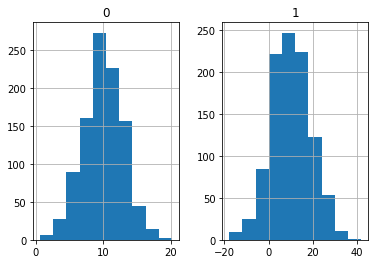

In [0]:
d.hist()

In [0]:
d = pd.DataFrame(np.random.normal(10,3,size=1000))

In [0]:
d

,0
0,6.485529
1,6.286959
2,3.226588
3,10.429126
4,10.260029
...,...
995,11.601069
996,5.754765
997,6.606431
998,13.809356


In [0]:
d['mean'] = d[0].mean()

In [0]:
d['err'] = (d[0] - d['mean'])**2

In [0]:
np.sqrt(d['err'].mean())

3.0155508379489047

In [0]:
d[0].std()

3.0170597451426286

In [0]:
np.sqrt(d['err'].sum() / (len(d) - 1))

3.0170597451426273